In [27]:
import numpy as np
from numpy.random import normal
from numpy.random import uniform
from numpy.linalg import inv
from math import sqrt
import pandas as pd
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N, p, sigma, low, high = 1000, 3, 1, -1, 1
b = np.array([[2, 5, -4, 0]]).T

In [3]:
sigma_squared_hat_biased = []
sigma_squared_hat_unbiased = []
for i in range(10000):
    X = uniform(low, high, size=(N, p+1))
    X[:,0] = 1
    y = X.dot(b) + normal(0, sigma, (N, 1))
    b_hat = inv(X.T.dot(X)).dot(X.T).dot(y)
    y_hat = X.dot(b_hat)
    sse = np.sum((y - y_hat)**2)
    sigma_squared_hat_biased.append(sse / N)
    sigma_squared_hat_unbiased.append(sse / (N-p-1))

In [4]:
np.mean(sigma_squared_hat_biased), np.mean(sigma_squared_hat_unbiased)

(0.9954172460819168, 0.9994149057047358)

In [5]:
sigma_hat = np.sqrt(sigma_squared_hat_unbiased[-1])
V = inv(X.T.dot(X))
v = []
z = []
for j in range(p+1):
    z.append(b_hat[j][0] / sigma_hat / sqrt(V[j,j]))
    v.append(V[j,j])
v = np.array(v)

In [6]:
z

[62.04748451741765, 91.33176336061861, -76.43455312740114, 0.8960900427252064]

In [7]:
b_hat = np.squeeze(b_hat)

In [8]:
(b_hat - 1.96*np.sqrt(v)*sigma_hat), (b_hat + 1.96*np.sqrt(v)*sigma_hat)

(array([ 1.87341909,  4.88447075, -4.20554298, -0.05852197]),
 array([ 1.9956376 ,  5.09871208, -3.99525122,  0.15710354]))

In [2]:
data = pd.read_csv("Prostate Cancer.txt") 
data.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [3]:
names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

In [4]:
data[data.train == 'T'][names].corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


In [5]:
lcavol = data[data.train == 'T'].lcavol.values
lweight = data[data.train == 'T'].lweight.values

In [6]:
lcavol_mean = np.mean(lcavol)
lweight_mean = np.mean(lweight)

lcavol_std = np.sqrt(np.mean((lcavol - lcavol_mean)**2))
lweight_std = np.sqrt(np.mean((lweight - lweight_mean)**2))
cor = np.mean((lcavol - lcavol_mean)*(lweight - lweight_mean))/(lcavol_std*lweight_std)

In [7]:
X = data[data.train == 'T'][names].values
y = data[data.train == 'T'][['lpsa']].values
X = (X - X.mean(axis=0)) / (X.std(axis=0))
X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

In [8]:
V = inv(X.T.dot(X))
v = np.diag(V)
b_hat = V.dot(X.T).dot(y)
y_hat = X.dot(b_hat)
RSS1 = np.sum((y - y_hat)**2)
var = np.sqrt(RSS1 / (X.shape[0] - X.shape[1]))

In [10]:
names0 = ['lcavol', 'lweight', 'lbph', 'svi']
X = data[data.train == 'T'][names0].values
y = data[data.train == 'T'][['lpsa']].values
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
V = inv(X.T.dot(X))
b_hat = V.dot(X.T).dot(y)
y_hat = X.dot(b_hat)
RSS0 = np.sum((y - y_hat)**2)

In [11]:
F = ((RSS0 - RSS1)/(len(names) - len(names0)))/(RSS1/(X.shape[0] - len(names) - 1))

In [12]:
y_test = data[data.train == 'F'][['lpsa']].values
X_test = data[data.train == 'F'][names0].values
X_test = (X_test - X_mean) / X_std
X_test = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))
y_test_hat = X_test.dot(b_hat)

In [13]:
np.mean((y_test - y_test_hat)**2)

0.45633212204016266

In [14]:
np.mean((y_test - np.mean(y))**2)

1.056733228060382

In [36]:
def mse_by_names(names):
    X = data[data.train == 'T'][names].values
    y = data[data.train == 'T'][['lpsa']].values
    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    X = (X - X_mean) / X_std
    X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    V = inv(X.T @ X)
    b_hat = V @X.T @ y
    y_hat = X @ b_hat
    mse = np.mean((y - y_hat)**2)
    
    X_test = data[data.train == 'F'][names].values
    y_test = data[data.train == 'F'][['lpsa']].values
    X_test = (X_test - X_mean) / X_std
    X_test = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))
    y_test_hat = X_test.dot(b_hat)
    mse = np.mean((y_test - y_test_hat)**2)

    return mse

In [37]:
names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
x, y = [], []
for k in range(0, len(names)):
    for comb in itertools.combinations(names, k):
        x.append(k)
        y.append(mse_by_names(list(comb)))

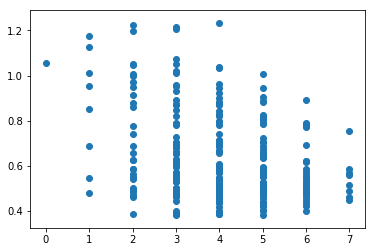

In [38]:
plt.scatter(x, y)